# solar_path
This notebook determines the solar position as a function of azimuth angle $\phi$ at Stawell for each day in a year. Solar position values to fit were found from:  https://www.sunearthtools.com/dp/tools/pos_sun.php#top . Someone should probably look for a more reliable algorithm for this :).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import astropy.units as unit
import astropy.constants as const
import itertools
import plotly.express as px 
import pandas as pd
from scipy.optimize import curve_fit


from axion_functions import *

In [3]:
annual_df = pd.read_excel("Data\\stawell_annual.xlsx")

In [13]:
dates = np.array(annual_df)[:,0]
alts  = np.array(annual_df)[:,1::2]
azs   = np.array(annual_df)[:,2::2]
mask  = alts[0,:] != '--'

In [17]:
def cosine_fit(x, amp, phase, vert):
    return amp*np.cos(np.pi/180*(x-phase))+vert

def fit_curves():
    curves = []
    for day in range(len(dates)):
        mask = alts[day,:] != '--'
        param,cov = curve_fit(cosine_fit, azs[day,:][mask], alts[day,:][mask], p0=(130, 0, 0))
        curves.append(param)
    return np.array(curves)

In [31]:
fits = fit_curves()

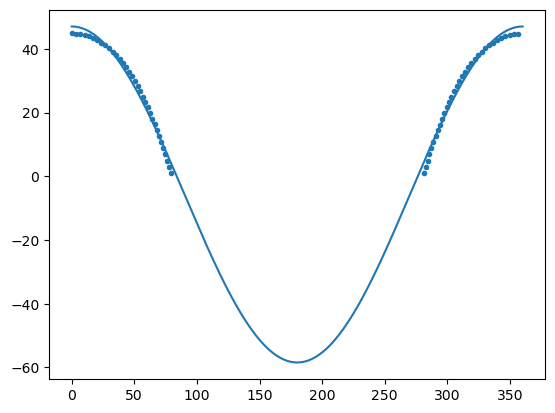

In [26]:
xaxis = np.arange(0, 360, 0.01)
yaxis = cosine_fit(xaxis, float(fits[100,0]), 
                          float(fits[100,1]), 
                          float(fits[100,2]))

fig,ax = plt.subplots()
ax.plot(xaxis, yaxis)
mask =     alts[100,:] != '--'
ax.scatter( azs[100,:][mask],
           alts[100,:][mask], marker=".")

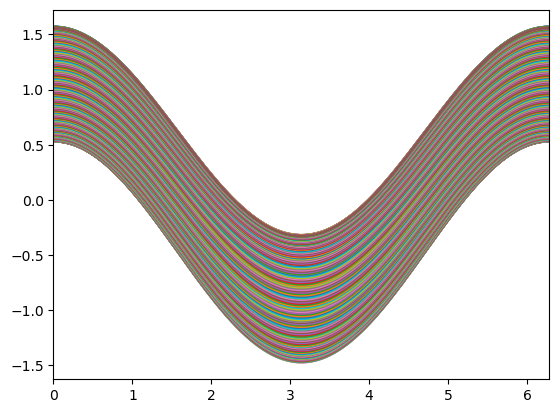

In [32]:
fig,ax = plt.subplots()

for triplet in fits:
    a = triplet[0]*np.pi/180
    p = triplet[1]*np.pi/180
    v = triplet[2]*np.pi/180
    ax.plot(xaxis, cosine_fit(180*xaxis/np.pi, a, p, v))

ax.set_xlim([0, 2*np.pi])
plt.show()

In [35]:
full_array = np.hstack([(np.array([dates]).transpose()), fits*np.pi/180])
full_df = pd.DataFrame(full_array, columns=["Date", "a", "p", "v"])
full_df.to_csv("Data\\cosine_fits.csv")